In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Cargar el dataset
file_path = 'data_evaluacion_decoded.csv'
df = pd.read_csv(file_path)

# Mostramos las primeras filas del dataset
df.head()


,Unnamed: 0,edad,fnlwgt,educacion_num,estado_civil,relacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,0,39,77516,13,1,1,4,1,1,0,40,1,0,1
1,1,50,83311,13,0,0,4,1,0,0,13,1,2,1
2,2,38,215646,9,1,1,4,1,0,0,40,1,1,1
3,3,53,234721,7,0,0,2,1,0,0,40,1,1,1
4,4,28,338409,13,0,5,2,0,0,0,40,0,1,1


In [51]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,edad,fnlwgt,educacion_num,estado_civil,relacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,39,77516,13,1,1,4,1,1,0,40,1,0,1
1,50,83311,13,0,0,4,1,0,0,13,1,2,1
2,38,215646,9,1,1,4,1,0,0,40,1,1,1
3,53,234721,7,0,0,2,1,0,0,40,1,1,1
4,28,338409,13,0,5,2,0,0,0,40,0,1,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   edad              48842 non-null  int64
 1   fnlwgt            48842 non-null  int64
 2   educacion_num     48842 non-null  int64
 3   estado_civil      48842 non-null  int64
 4   relacion          48842 non-null  int64
 5   raza              48842 non-null  int64
 6   genero            48842 non-null  int64
 7   ganancia-capital  48842 non-null  int64
 8   perdida-capital   48842 non-null  int64
 9   horas_semana      48842 non-null  int64
 10  pais              48842 non-null  int64
 11  tipo_empleo       48842 non-null  int64
 12  salario           48842 non-null  int64
dtypes: int64(13)
memory usage: 4.8 MB


<Axes: >

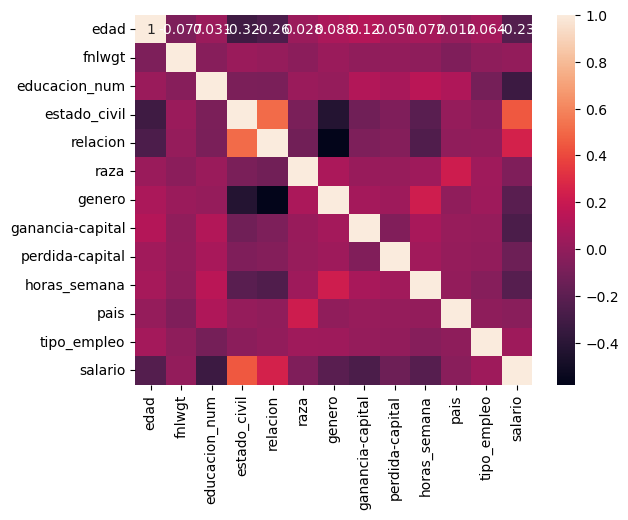

In [53]:
#Ver las relaciones de las etiquetas
sns.heatmap(df.corr(), annot=True)

In [54]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(['salario'], axis=1)
y = df['salario']

In [56]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Escalar las características utilizando MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Entrenar el modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [58]:
# Realizar predicciones con regresión logística
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [59]:
# Evaluar el modelo de regresión logística
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)
confusion_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg)

In [60]:
# Entrenar el modelo de bosque aleatorio
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Realizar predicciones con bosque aleatorio
y_pred_rf = rf_clf.predict(X_test_scaled)

In [61]:
# Evaluar el modelo de bosque aleatorio
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)


In [62]:
# Función para mostrar la matriz de confusión
def plot_confusion_matrix(conf_matrix, title):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

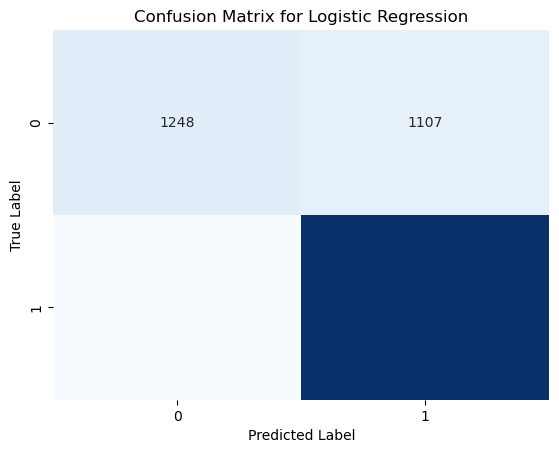

In [48]:
# Matriz de confusión para la regresión logística
plot_confusion_matrix(confusion_mat_log_reg, 'Confusion Matrix for Logistic Regression')


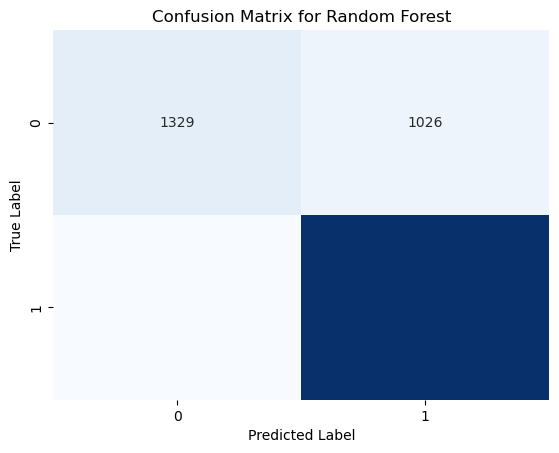

In [45]:
# Matriz de confusión para el bosque aleatorio
plot_confusion_matrix(confusion_mat_rf, 'Confusion Matrix for Random Forest')

In [46]:
# Evaluación del modelo de regresión logística
print("Classification Report for Logistic Regression:")
print(classification_rep_log_reg)
print('Train Accuracy:', (log_reg.score(X_train_scaled, y_train)) * 100, "%")
print('Test Accuracy:', (log_reg.score(X_test_scaled, y_test)) * 100, "%")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.53      0.60      2355
           1       0.86      0.93      0.89      7414

    accuracy                           0.83      9769
   macro avg       0.78      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769

Train Accuracy: 83.63575870805927 %
Test Accuracy: 83.04841846657796 %
Accuracy: 0.8304841846657796


In [47]:
# Evaluación del modelo de bosque aleatorio
print("Classification Report for Random Forest:")
print(classification_rep_rf)
print('Train Accuracy:', (rf_clf.score(X_train_scaled, y_train)) * 100, "%")
print('Test Accuracy:', (rf_clf.score(X_test_scaled, y_test)) * 100, "%")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.65      0.56      0.61      2355
           1       0.87      0.90      0.89      7414

    accuracy                           0.82      9769
   macro avg       0.76      0.73      0.75      9769
weighted avg       0.82      0.82      0.82      9769

Train Accuracy: 99.9590510070893 %
Test Accuracy: 82.23973794656567 %
Accuracy: 0.8223973794656567
